# **Title:**
#        **ITSM Improvement through Machine Learning: Enhancing Incident Management at ABC Tech.**

# **PROBLEM** **OF** **STATEMENT:**

*   Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

*   Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

*    Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

*    Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.









# **Description:**
## **Business Case Description:**

ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade. They manage a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year. ABC Tech follows best practices in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes. These ITIL practices have matured over time, reaching a high level of process maturity.

Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI). Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance their ITSM processes. After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

1. **Predicting High Priority Tickets:** ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or incidents before they escalate.

2. **Forecasting Incident Volume:** The organization plans to use ML to forecast the incident volume in different fields on a quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required technology upgrades.

3. **Auto-Tagging Tickets:** ABC Tech intends to implement a text classification ML model to automatically assign correct priorities and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.

4. **Predicting RFC and ITSM Asset Misconfigurations:** The organization aims to create predictive models for Request for Change (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in preventing disruptions and improving overall ITSM asset management.

The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details are provided.

Here's a summary of some key fields in the dataset:

- CI_Name: Configuration Item Name
- CI_Cat: Configuration Item Category
- CI_Subcat: Configuration Item Subcategory
- Incident_ID: Incident Identifier
- Status: Incident Status (e.g., Closed)
- Impact: Impact level
- Urgency: Urgency level
- Priority: Incident Priority
- Category: Incident Category
- KB_number: Knowledge Base Number
- Alert_Status: Alert Status
- No_of_Reassignments: Number of Reassignments
- Open_Time: Incident Open Time
- Reopen_Time: Incident Reopen Time
- Resolved_Time: Incident Resolved Time
- Close_Time: Incident Close Time
- Handle_Time_hrs: Time taken to handle the incident (in hours)
- Closure_Code: Code for incident closure
- No_of_Related_Interactions: Number of Related Interactions
- Related_Interaction: Identifier for Related Interaction
- No_of_Related_Incidents: Number of Related Incidents
- No_of_Related_Changes: Number of Related Changes
- Related_Change: Identifier for Related Change


## **Import Basic Libraries:**

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Load Data:**

In [178]:
data=pd.read_csv("/content/ITSM_data.csv")

In [179]:
#data=pd.set_option("display.max_columns",None)
#data=pd.set_option("display.max_rows",None)
#data=pd.set_option("display.expand_frame_repr",False)

In [180]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [181]:
data.sample(20)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
32819,SBA000609,application,Server Based Application,WBS000263,IM0033115,Closed,5,5,5.0,0.012484,...,NaN,4/2/2014 7:34,4/2/2014 7:34,"72,925",Questions,1.0,SD0100405,NaN,NaN,NaN
11263,SBA000423,application,Server Based Application,WBS000054,IM0011439,Closed,5,5,5.0,0.001190,...,12/11/2013 14:51,19-11-2013 09:23,19-11-2013 09:23,"4,83,07,22,222",Other,3.0,#MULTIVALUE,NaN,NaN,NaN
8082,LAP000646,computer,Laptop,WBS000091,IM0008242,Closed,5,5,5.0,0.211391,...,NaN,25-10-2013 11:52,25-10-2013 11:52,"0,01",Hardware,1.0,SD0021803,NaN,NaN,NaN
46346,SBA000812,application,Server Based Application,WBS000223,IM0046794,Closed,4,4,4.0,0.537767,...,NaN,31-03-2014 11:43,31-03-2014 11:43,"7,13,38,88,889",Software,1.0,SD0145754,NaN,NaN,NaN
38153,SBA000609,application,Server Based Application,WBS000263,IM0038471,Closed,5,5,5.0,0.846139,...,NaN,25-02-2014 16:43,25-02-2014 16:45,"3,50,69,16,667",Questions,1.0,SD0117246,1.0,NaN,NaN
31841,LAP000969,computer,Laptop,WBS000091,IM0032130,Closed,5,5,5.0,0.550200,...,NaN,13-02-2014 15:01,13-02-2014 15:01,"3,38,81,66,667",Hardware,2.0,#MULTIVALUE,NaN,NaN,NaN
21403,SBA000630,application,Server Based Application,WBS000070,IM0021638,Closed,5,5,5.0,0.758210,...,NaN,17-12-2013 13:23,17-12-2013 13:23,"0,513611111",No error - works as designed,1.0,SD0064020,NaN,NaN,NaN
16890,SBA000072,application,Server Based Application,WBS000244,IM0017105,Closed,4,4,4.0,0.592586,...,NaN,28-11-2013 10:02,28-11-2013 10:02,"3,26,55,55,556",Software,1.0,SD0049273,NaN,NaN,NaN
30153,SBA000017,application,Server Based Application,WBS000099,IM0030437,Closed,3,3,3.0,0.784753,...,NaN,NaN,23-01-2014 11:13,"0,077222222",User error,1.0,SD0092276,NaN,NaN,NaN
3705,SBA000607,application,Server Based Application,WBS000263,IM0003827,Closed,5,5,5.0,0.159200,...,NaN,9/10/2013 16:53,9/10/2013 16:54,"1,65,69,44,444",User error,1.0,SD0008785,NaN,NaN,NaN


In [182]:
data.drop(["CI_Name", "WBS", "Incident_ID", "KB_number", "Related_Interaction","Related_Change","Open_Time","Close_Time","Resolved_Time","Handle_Time_hrs"], axis=1, inplace=True)

In [183]:
data.shape


(46606, 15)

# **Domain Analysis:**
Certainly! Domain analysis is an essential step in any data science or machine learning project. It involves gaining a deep understanding of the domain-specific aspects of the problem you're trying to solve. In this case, we're analyzing the domain of IT Service Management (ITSM) within the context of ABC Tech's business case. Here's a domain analysis for ITSM:

**1. IT Service Management (ITSM):**
   - **Definition:** IT Service Management (ITSM) refers to a set of practices and processes used by organizations to design, deliver, manage, and improve IT services for their customers and end-users.
   - **Importance:** ITSM ensures that IT services are aligned with business goals, reliable, and efficiently delivered, leading to enhanced customer satisfaction and business performance.

**2. Incident Management:**
   - **Definition:** Incident Management is a core ITSM process that involves identifying, categorizing, prioritizing, and resolving incidents to restore normal service operations as quickly as possible.
   - **Challenges:** Common challenges in incident management include handling a high volume of incidents, determining incident priorities, minimizing response times, and reducing the impact on end-users.

**3. Priority in ITSM:**
   - **Definition:** Priority is a classification system used to categorize incidents based on their severity and impact on business operations. In ITIL (IT Infrastructure Library) framework, there are typically four priority levels: Priority 1 (Critical), Priority 2 (High), Priority 3 (Medium), and Priority 4 (Low).
   - **Importance:** Prioritizing incidents helps organizations allocate resources effectively and respond to critical issues promptly.

**4. ITIL Framework:**
   - **Definition:** ITIL is a widely adopted framework for ITSM that provides best practices and guidelines for managing IT services, including incident management, problem management, change management, and configuration management.
   - **Maturity Levels:** ITIL processes can mature over time, starting from ad-hoc practices and progressing to well-defined, controlled, and optimized processes. A mature ITIL framework leads to improved service quality and efficiency.

**5. Machine Learning in ITSM:**
   - **Application:** Machine learning can be applied to ITSM processes to predict incidents, automate ticket classification, forecast resource needs, and detect anomalies or misconfigurations in IT assets.
   - **Benefits:** ML can enhance incident response, reduce manual workload, improve service quality, and proactively identify issues before they impact operations.

**6. Data Considerations:**
   - **Data Sources:** Data for ITSM projects typically come from various sources, including incident tracking systems, service logs, configuration databases, and customer feedback.
   - **Data Quality:** Data quality is critical, as inaccurate or incomplete data can lead to incorrect predictions and decisions.
   - **Privacy and Compliance:** ITSM data often contains sensitive information, so privacy and compliance with data protection regulations (e.g., GDPR) are crucial considerations.

**7. Metrics and KPIs:**
   - **Key Metrics:** Key Performance Indicators (KPIs) in ITSM include Mean Time to Resolve (MTTR), Incident Response Time, Incident Closure Rate, and Customer Satisfaction.
   - **Monitoring:** Continuous monitoring of KPIs helps organizations assess the effectiveness of their ITSM processes and make improvements.

**8. Stakeholders:**
   - **Internal Stakeholders:** IT teams, IT managers, incident responders, change management teams.
   - **External Stakeholders:** End-users, customers, auditors (for compliance).

**9. Challenges:**
   - **Scalability:** Handling a large volume of incidents efficiently can be challenging.
   - **Data Integration:** Integrating data from disparate sources can be complex.
   - **Change Management:** Implementing ML solutions may require organizational and cultural changes.


## **Basic Checks:**

In [184]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Reopen_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,closed,26.0,NaN,Other,1.0,2.0,NaN
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,closed,33.0,2/12/2013 12:31,Software,1.0,1.0,NaN
2,application,Desktop Application,Closed,NS,3,NaN,0.517551,request for information,closed,3.0,NaN,No error - works as designed,1.0,NaN,NaN
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,closed,13.0,NaN,Operator error,1.0,NaN,NaN
4,application,Web Based Application,Closed,4,4,4.0,0.345258,incident,closed,2.0,NaN,Other,1.0,NaN,NaN


In [185]:
data.tail()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Reopen_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
46601,application,Server Based Application,Closed,4,4,4.0,0.231896,incident,closed,0.0,NaN,Other,1.0,NaN,NaN
46602,application,Server Based Application,Closed,4,4,4.0,0.805153,incident,closed,0.0,NaN,User error,1.0,NaN,NaN
46603,computer,Laptop,Closed,5,5,5.0,0.917466,incident,closed,0.0,NaN,Hardware,1.0,NaN,NaN
46604,application,Web Based Application,Closed,4,4,4.0,0.701278,incident,closed,0.0,NaN,Software,1.0,NaN,NaN
46605,hardware,DataCenterEquipment,Closed,3,3,3.0,0.902320,incident,closed,0.0,NaN,Hardware,1.0,NaN,NaN


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46495 non-null  object 
 1   CI_Subcat                   46495 non-null  object 
 2   Status                      46606 non-null  object 
 3   Impact                      46606 non-null  object 
 4   Urgency                     46606 non-null  object 
 5   Priority                    45226 non-null  float64
 6   number_cnt                  46606 non-null  float64
 7   Category                    46606 non-null  object 
 8   Alert_Status                46606 non-null  object 
 9   No_of_Reassignments         46605 non-null  float64
 10  Reopen_Time                 2284 non-null   object 
 11  Closure_Code                46146 non-null  object 
 12  No_of_Related_Interactions  46492 non-null  float64
 13  No_of_Related_Incidents     122

In [187]:
data.dtypes

CI_Cat                         object
CI_Subcat                      object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
Alert_Status                   object
No_of_Reassignments           float64
Reopen_Time                    object
Closure_Code                   object
No_of_Related_Interactions    float64
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
dtype: object

In [188]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'Alert_Status', 'No_of_Reassignments',
       'Reopen_Time', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents', 'No_of_Related_Changes'],
      dtype='object')

In [189]:
cat_data=data.select_dtypes(include=["O"]).columns
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Reopen_Time', 'Closure_Code'],
      dtype='object')

In [190]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("----------------------------")

CI_Cat ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64
----------------------------
CI_Subcat ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 

In [191]:
num_data=data.select_dtypes(include=["float64","int64"]).columns
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [192]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Priority,45226.0,4.215805,0.705624,1.000000,4.000000,4.000000,5.000000,5.000000
number_cnt,46606.0,0.499658,0.288634,0.000023,0.248213,0.500269,0.749094,0.999997
No_of_Reassignments,46605.0,1.131831,2.269774,0.000000,0.000000,0.000000,2.000000,46.000000
No_of_Related_Interactions,46492.0,1.149897,2.556338,1.000000,1.000000,1.000000,1.000000,370.000000
No_of_Related_Incidents,1222.0,1.669394,3.339687,1.000000,1.000000,1.000000,1.000000,63.000000
No_of_Related_Changes,560.0,1.058929,0.403596,1.000000,1.000000,1.000000,1.000000,9.000000


In [193]:
data.describe(include="object")

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Category,Alert_Status,Reopen_Time,Closure_Code
count,46495,46495,46606,46606,46606,46606,46606,2284,46146
unique,12,64,2,6,11,4,1,2244,14
top,application,Server Based Application,Closed,4,4,incident,closed,29-10-2013 15:03,Other
freq,32900,18811,46597,22556,15526,37748,46606,2,16470


##Unique value will be 1 for constant column.Here, Alert_Status is the constant feature. so we drop the column.

In [194]:
data.sample()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Reopen_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
11089,application,Web Based Application,Closed,4,4,4.0,0.581854,incident,closed,0.0,NaN,Other,1.0,NaN,NaN


In [195]:
data.drop(["Alert_Status"],axis=1,inplace=True)

##**Basic Checks Report:**
###**Overview:**
When working with IT Service Management (ITSM) data or any dataset, it's essential to perform basic data checks to ensure the quality and integrity of the data. These basic checks help identify issues early on and ensure that your analysis or project is based on reliable data.

**Data Shape**: We Check the dimensions of the dataset, i.e., the number of rows and columns, using data.shape. Data Contains 46606 Rows and 25 columns.
**Data Types:** We Verified that the data types of each column are as expected usingdata.dtypes.Priority,number_cnt,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,No_of_Reassignments are in float64 and remaining columns are in object.

**Descriptive Statistics:** We Used data.describe().T to get summary statistics (mean, min, max, etc.) for numerical columns.
Use data.describe(include='O').T for a summary of categorical columns.

**Unique Values:** Checked the number of unique values in categorical columns using data['column'].unique(). here, One constant columns are there. so we dropped that column.

**Value Counts:** Examined the distribution of categorical values using df['column'].value_counts().

The goal is to ensure that our data is clean, complete, and suitable for analysis or further processing.

#**Data Preprocessing**


In [196]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'No_of_Reassignments', 'Reopen_Time',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [197]:
data.dtypes

CI_Cat                         object
CI_Subcat                      object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
No_of_Reassignments           float64
Reopen_Time                    object
Closure_Code                   object
No_of_Related_Interactions    float64
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
dtype: object

In [198]:
data.duplicated().sum()

0

In [199]:
data.isnull().sum()

CI_Cat                          111
CI_Subcat                       111
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

## **Replacing Null Values**

### **Replacing Null Values for CI_Cat**

In [200]:
data[data["CI_Cat"].isnull()]["CI_Cat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
        ... 
34462    NaN
34868    NaN
36150    NaN
38262    NaN
38429    NaN
Name: CI_Cat, Length: 111, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'subapplication'),
  Text(1, 0, 'application'),
  Text(2, 0, 'computer'),
  Text(3, 0, 'displaydevice'),
  Text(4, 0, 'software'),
  Text(5, 0, 'storage'),
  Text(6, 0, 'database'),
  Text(7, 0, 'hardware'),
  Text(8, 0, 'officeelectronics'),
  Text(9, 0, 'networkcomponents'),
  Text(10, 0, 'applicationcomponent'),
  Text(11, 0, 'Phone')])

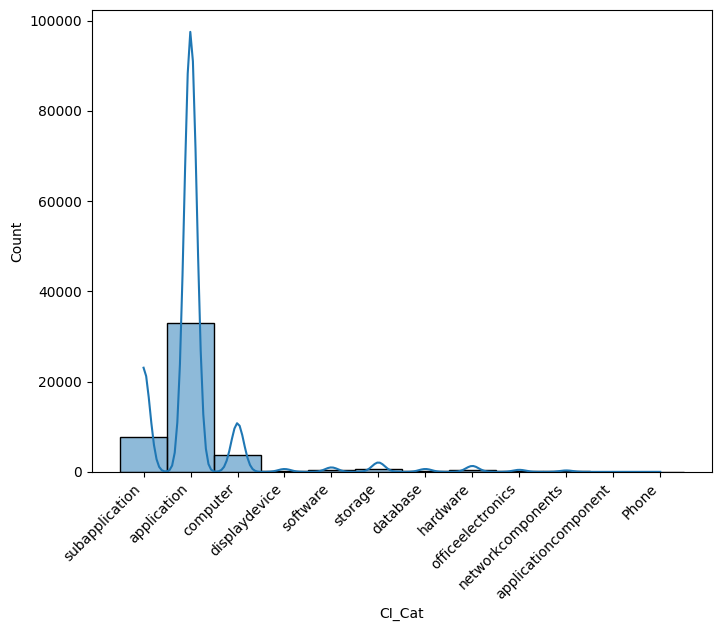

In [201]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Cat'], kde=True)
#sns.histplot(data=data, x=data["CI_Cat"],order=data["CI_Cat"].value_counts().index,kde=true)
plt.xticks(rotation=45,ha="right")

* The majority of the data is between 0 and 600.
* There are a few outliers at the high end.
* The median is slightly higher than the mode, which suggests that the data is somewhat skewed to the right.

In [202]:
data["CI_Cat"].mode()

0    application
Name: CI_Cat, dtype: object

In [203]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [204]:
data.loc[data["CI_Cat"].isnull()==True,"CI_Cat"]="application"

In [205]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                       111
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for CI_Subcat**

In [206]:
data[data["CI_Subcat"].isnull()]["CI_Subcat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
        ... 
34462    NaN
34868    NaN
36150    NaN
38262    NaN
38429    NaN
Name: CI_Subcat, Length: 111, dtype: object

<Axes: xlabel='CI_Subcat', ylabel='Count'>

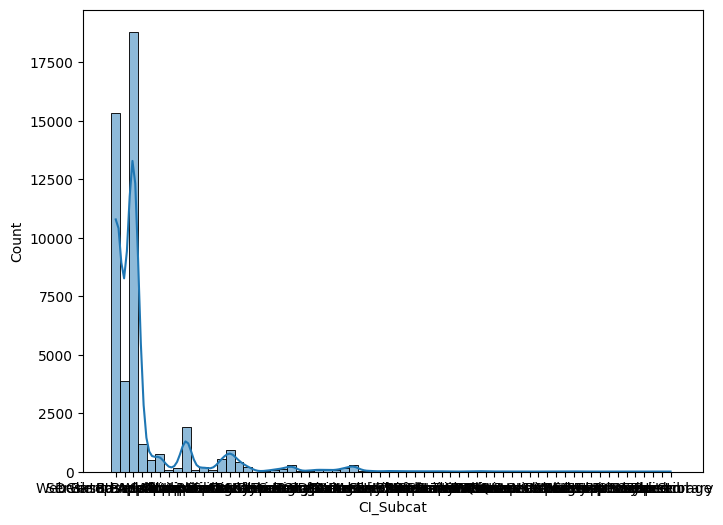

In [207]:


plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Subcat'], kde=True)

* The distribution of the CI_Subcat column is skewed to the right.
* There is a small number of outliers at the high end, representing CI_Subcat values of In Progress and Not Started.

In [208]:
data["CI_Subcat"].mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

In [209]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: CI_Subcat, Length: 64, dtype: int64

In [210]:
data.loc[data["CI_Subcat"].isnull()==True,"CI_Subcat"]="Server Based Application"

In [211]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for Priority**





In [212]:
data[data["Priority"].isnull()]["Priority"]

2       NaN
8       NaN
103     NaN
147     NaN
152     NaN
         ..
46424   NaN
46446   NaN
46484   NaN
46553   NaN
46590   NaN
Name: Priority, Length: 1380, dtype: float64

<Axes: xlabel='Priority', ylabel='Count'>

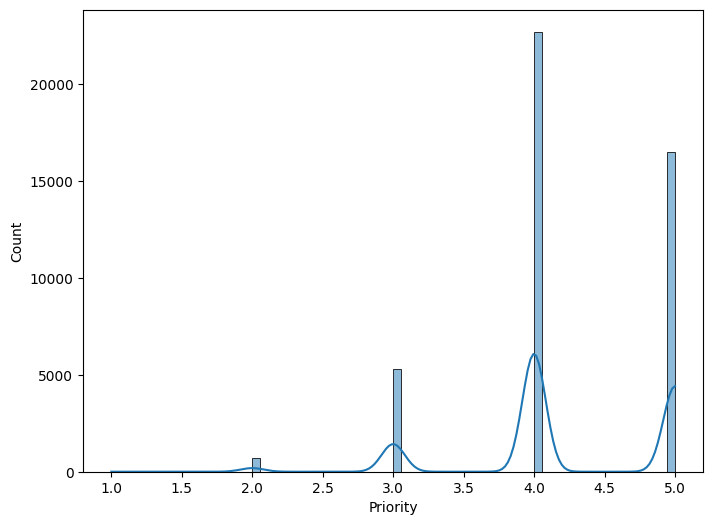

In [213]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Priority'], kde=True)

* The distribution of the data is skewed to the right, with most values between 20 and 50.
* There are a few outliers at the high end, with values above 100.

In [214]:
data["Priority"].median()

4.0

In [215]:
data["Priority"].mode()

0    4.0
Name: Priority, dtype: float64

In [216]:
data.loc[data["Priority"].isnull()==True,"Priority"]=4.0

In [217]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

In [218]:
data.sample(10)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Reopen_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
43616,application,Server Based Application,Closed,4,4,4.0,0.192195,incident,0.0,NaN,Other,1.0,NaN,NaN
45204,application,Server Based Application,Closed,4,4,4.0,0.756110,request for information,2.0,NaN,Other,1.0,NaN,NaN
44861,storage,SAN,Closed,NS,3,4.0,0.302435,incident,0.0,NaN,Hardware,1.0,NaN,NaN
18468,application,SAP,Closed,5,5,5.0,0.014291,request for information,2.0,NaN,Other,1.0,NaN,NaN
39042,application,Web Based Application,Closed,4,4,4.0,0.635985,incident,4.0,NaN,Other,1.0,NaN,NaN
15757,subapplication,Web Based Application,Closed,4,4,4.0,0.214522,incident,0.0,NaN,Software,1.0,NaN,NaN
17728,subapplication,Web Based Application,Closed,4,4,4.0,0.258364,incident,3.0,NaN,Other,1.0,NaN,NaN
22225,application,Server Based Application,Closed,4,4,4.0,0.144813,incident,3.0,NaN,Software,1.0,NaN,NaN
32618,subapplication,Server Based Application,Closed,5,5,5.0,0.054018,request for information,0.0,NaN,Data,1.0,NaN,NaN
24717,application,Server Based Application,Closed,5,5,5.0,0.009372,request for information,2.0,NaN,Other,1.0,NaN,NaN


### **Remove the row with the null value for No_of_Reassignments**

In [219]:
# Remove the row with the null value in the 'No_of_Reassignments' column
data = data.dropna(subset=['No_of_Reassignments'])

In [220]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Reopen_Time                   44321
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

### **Replacing Null Values for Closure_Code**

In [221]:
data[data["Closure_Code"].isnull()]["Closure_Code"]

9275     NaN
9488     NaN
9698     NaN
9989     NaN
10045    NaN
        ... 
46077    NaN
46247    NaN
46291    NaN
46357    NaN
46413    NaN
Name: Closure_Code, Length: 460, dtype: object

<Axes: xlabel='Closure_Code', ylabel='Count'>

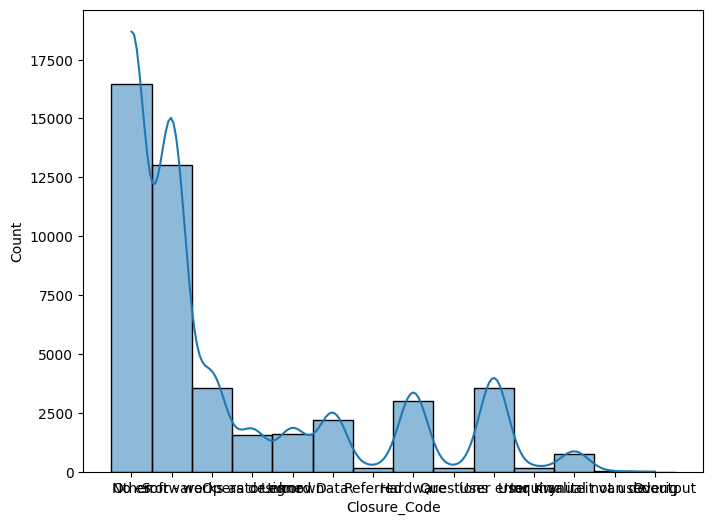

In [222]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Closure_Code'], kde=True)

In [223]:
data["Closure_Code"].mode()

0    Other
Name: Closure_Code, dtype: object

In [224]:
data.Closure_Code.unique()
data.Closure_Code.value_counts()

Other                           16470
Software                        13026
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: Closure_Code, dtype: int64

In [225]:
data.loc[data["Closure_Code"].isnull()==True,"Closure_Code"]="other"

In [226]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Reopen_Time                   44321
Closure_Code                      0
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

## **Replacing Null Values for No_of_Related_Interactions**

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 0 to 46605
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  object 
 1   CI_Subcat                   46605 non-null  object 
 2   Status                      46605 non-null  object 
 3   Impact                      46605 non-null  object 
 4   Urgency                     46605 non-null  object 
 5   Priority                    46605 non-null  float64
 6   number_cnt                  46605 non-null  float64
 7   Category                    46605 non-null  object 
 8   No_of_Reassignments         46605 non-null  float64
 9   Reopen_Time                 2284 non-null   object 
 10  Closure_Code                46605 non-null  object 
 11  No_of_Related_Interactions  46491 non-null  float64
 12  No_of_Related_Incidents     1222 non-null   float64
 13  No_of_Related_Changes       560

In [228]:
data.No_of_Related_Interactions.isnull().sum()

114

In [229]:
data.No_of_Related_Interactions.unique()
data.No_of_Related_Interactions.value_counts()

1.0      43057
2.0       2736
3.0        429
4.0        124
5.0         30
6.0         16
7.0         12
8.0          6
12.0         6
9.0          5
20.0         5
13.0         4
42.0         3
22.0         3
19.0         3
10.0         3
15.0         3
39.0         2
26.0         2
11.0         2
33.0         2
44.0         2
17.0         2
16.0         2
14.0         2
23.0         2
45.0         2
18.0         2
34.0         2
29.0         2
28.0         2
55.0         1
43.0         1
25.0         1
27.0         1
370.0        1
40.0         1
37.0         1
57.0         1
118.0        1
24.0         1
74.0         1
41.0         1
30.0         1
88.0         1
31.0         1
54.0         1
288.0        1
21.0         1
Name: No_of_Related_Interactions, dtype: int64

In [230]:
#data[data["No_of_Related_Interactions"].isnull()]["No_of_Related_Interactions"]

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

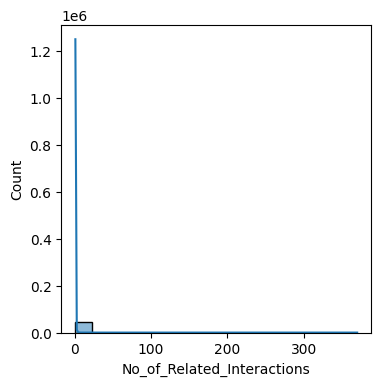

In [231]:
plt.figure(figsize=(4,4))
sns.histplot(data=data, x=data['No_of_Related_Interactions'], kde=True)

In [232]:
data["No_of_Related_Interactions"].median()

1.0

In [233]:
data["No_of_Related_Interactions"].mode()

0    1.0
Name: No_of_Related_Interactions, dtype: float64

In [234]:
data.loc[data["No_of_Related_Interactions"].isnull()==True,"No_of_Related_Interactions"]=1.0

In [235]:
data.No_of_Related_Interactions.isnull().sum()

0

##Check the Missing Values in percentage

In [236]:
data.isnull().sum()/len(data)*100

CI_Cat                         0.000000
CI_Subcat                      0.000000
Status                         0.000000
Impact                         0.000000
Urgency                        0.000000
Priority                       0.000000
number_cnt                     0.000000
Category                       0.000000
No_of_Reassignments            0.000000
Reopen_Time                   95.099238
Closure_Code                   0.000000
No_of_Related_Interactions     0.000000
No_of_Related_Incidents       97.377964
No_of_Related_Changes         98.798412
dtype: float64

Here, The Data shows Reopen Time,No of Related Interactions and No of Related Changes are above 95% of missing values. so we drop these columns.

In [237]:
data.drop("No_of_Related_Changes",axis=1,inplace=True)

In [238]:
data.drop("No_of_Related_Incidents",axis=1,inplace=True)

In [239]:
data.drop("Reopen_Time",axis=1,inplace=True)

In [240]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'No_of_Reassignments', 'Closure_Code',
       'No_of_Related_Interactions'],
      dtype='object')

# **Check for Outliers**

In [241]:
num_data=data.select_dtypes(include=["int64","float64"]).columns

In [242]:
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions'],
      dtype='object')

In [243]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Reopen_Time', 'Closure_Code'],
      dtype='object')

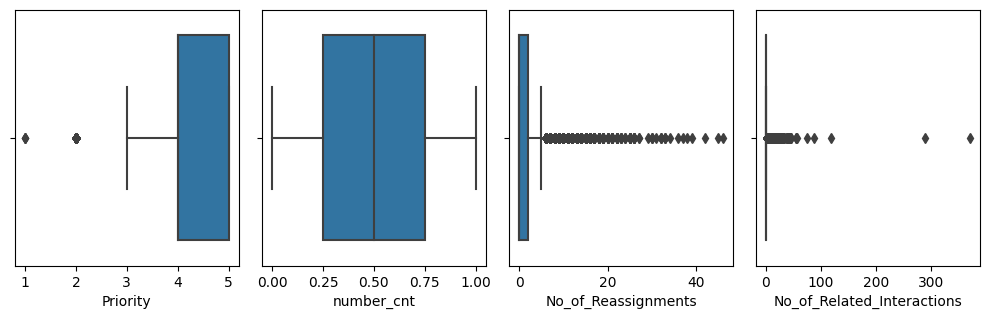

In [244]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in num_data:
  if plotnumber<8:
    ax=plt.subplot(2,4,plotnumber)
    sns.boxplot(x=data[col])
    plt.xlabel(col,fontsize=10)

  plotnumber+=1
plt.tight_layout()

## **Box Plot for number_cnt**

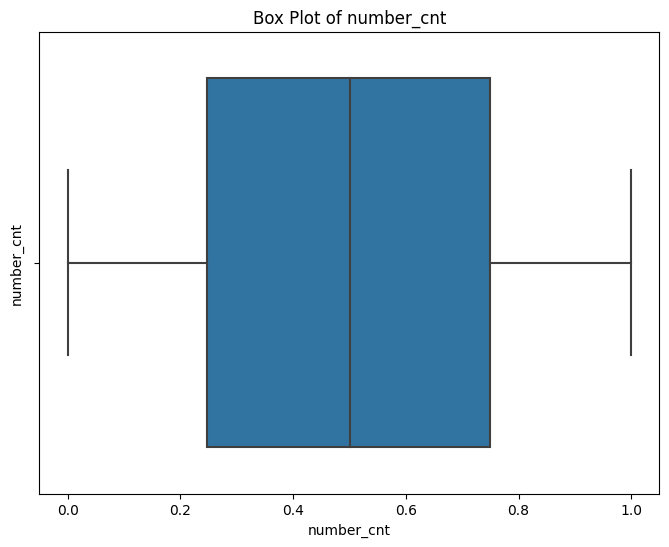

In [245]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['number_cnt'])
plt.title('Box Plot of number_cnt')
plt.ylabel('number_cnt')
plt.show()


## **Box Plot for No_of_Reassignments**

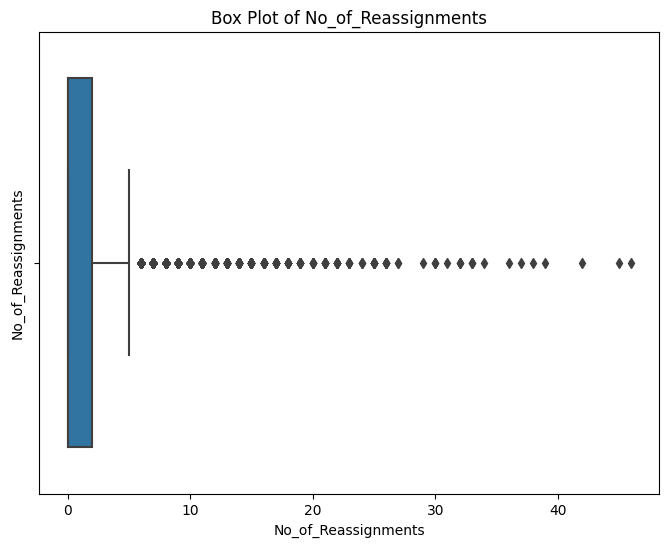

In [246]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Reassignments'])
plt.title('Box Plot of No_of_Reassignments')
plt.ylabel('No_of_Reassignments')
plt.show()

## **Outliers Handle for No_of_Reassignments**

<Axes: xlabel='No_of_Reassignments', ylabel='Count'>

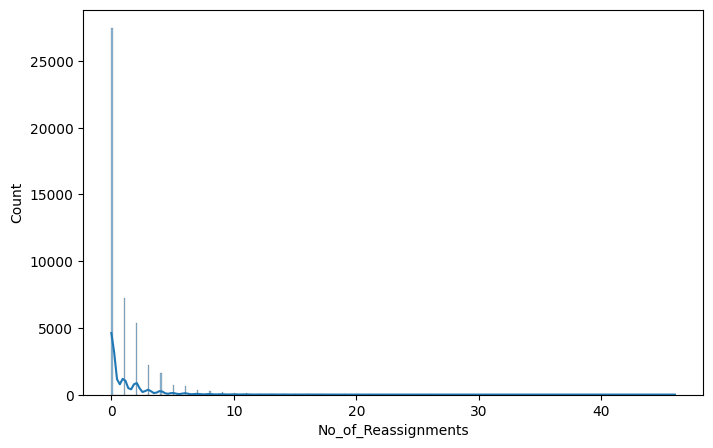

In [247]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Reassignments',kde=True)

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [248]:
Q1=data["No_of_Reassignments"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Reassignments"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 0.0
upper_quartile 2.0


In [249]:
IQR=Q3-Q1
IQR

2.0

In [250]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -3.0
upper_limit is 5.0


In [251]:
data.loc[data["No_of_Reassignments"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,26.0,Other,1.0
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,33.0,Software,1.0
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,13.0,Operator error,1.0
10,application,Web Based Application,Closed,4,4,4.0,0.439909,incident,6.0,Software,1.0
11,application,Web Based Application,Closed,4,4,4.0,0.291928,incident,8.0,Software,1.0
...,...,...,...,...,...,...,...,...,...,...,...
44961,application,Server Based Application,Closed,3,3,3.0,0.267787,incident,10.0,Other,2.0
45040,application,Server Based Application,Closed,5,5,5.0,0.680022,incident,6.0,Software,1.0
45196,application,Server Based Application,Closed,4,4,4.0,0.449103,incident,7.0,Other,1.0
45273,application,Desktop Application,Closed,4,4,4.0,0.166302,incident,8.0,Software,1.0


In [252]:
len(data.loc[data["No_of_Reassignments"]>upper_limit])/len(data)

0.042334513464220576

In [253]:
data.loc[data["No_of_Reassignments"]>upper_limit,"No_of_Reassignments"]=data["No_of_Reassignments"].median()

<Axes: xlabel='No_of_Reassignments'>

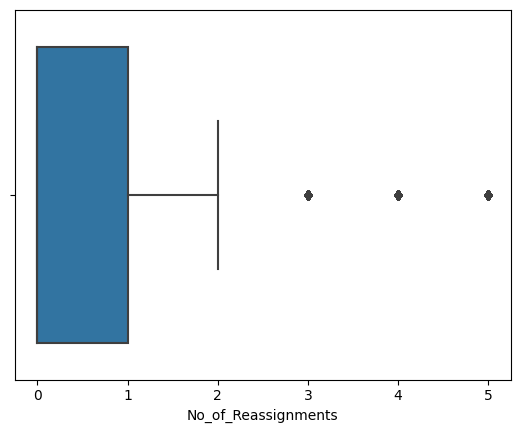

In [254]:
sns.boxplot(x=data.No_of_Reassignments)

## **Box Plot for No_of_Related_Interactions**

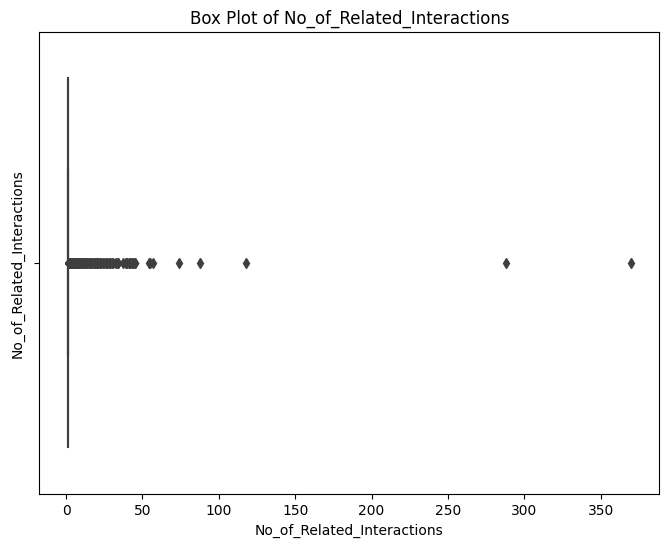

In [255]:
# Create a box plot for the 'No_of_Related_Interactions' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.title('Box Plot of No_of_Related_Interactions')
plt.ylabel('No_of_Related_Interactions')
plt.show()

## **Outliers Handle for No_of_Related_Interactions**

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

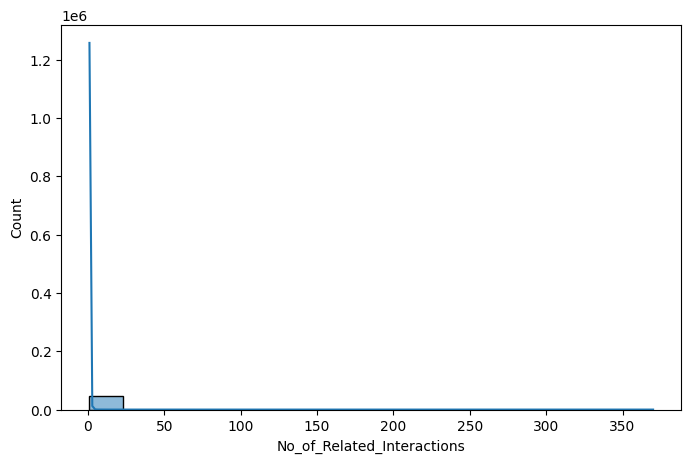

In [256]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Interactions',kde=True)

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [257]:
Q1 = data["No_of_Related_Interactions"].quantile(0.25)
print("lower_quantile",Q1)
Q3 = data["No_of_Related_Interactions"].quantile(0.75)
print("upper_quantile",Q3)

lower_quantile 1.0
upper_quantile 1.0


In [258]:
IQR=Q3 - Q1
IQR

0.0

In [259]:
lower_limit = Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit = Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [260]:
data.loc[data["No_of_Related_Interactions"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
12,application,Web Based Application,Closed,4,4,4.0,0.776486,incident,5.0,Software,2.0
18,application,Desktop Application,Closed,3,3,3.0,0.860255,incident,0.0,Other,2.0
19,application,Web Based Application,Closed,5,5,5.0,0.663615,incident,5.0,Other,2.0
27,application,Server Based Application,Closed,5,5,5.0,0.748361,request for information,0.0,No error - works as designed,2.0
29,application,Server Based Application,Closed,5,5,5.0,0.853722,request for information,2.0,Other,2.0
...,...,...,...,...,...,...,...,...,...,...,...
46455,application,Server Based Application,Closed,4,4,4.0,0.175887,incident,1.0,Other,2.0
46458,application,Server Based Application,Closed,5,5,5.0,0.969598,incident,0.0,Software,2.0
46460,application,Server Based Application,Closed,5,3,4.0,0.628989,incident,0.0,Software,2.0
46471,application,Server Based Application,Closed,5,5,5.0,0.280788,incident,0.0,Software,2.0


In [261]:
data.loc[data["No_of_Related_Interactions"]<lower_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions


In [262]:
#len(data.loc[data["No_of_Related_Interactions"]>upper_limit])/len(data)

In [263]:
#data.loc[data["No_of_Related_Interactions"]>upper_limit,"No_of_Related_Interactions"]=data["No_of_Related_Interactions"].median()

<Axes: xlabel='No_of_Related_Interactions'>

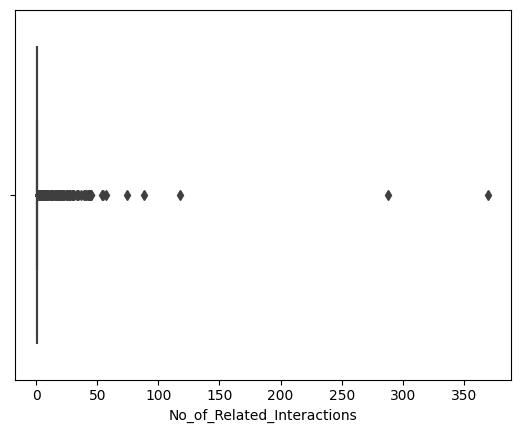

In [264]:
sns.boxplot(x=data.No_of_Related_Interactions)

* Median number of related interactions is 1.
* 75% of tickets have 3 or fewer related interactions.
* There are a few outliers with many related interactions (up to 20).


## **Box Plot for No_of_Related_Incidents**

In [265]:
# Create a box plot for the 'No_of_Related_Incidents' column
#plt.figure(figsize=(8,6))
#sns.boxplot(x=data['No_of_Related_Incidents'])
#plt.title('Box Plot of No_of_Related_Incidents')
#plt.ylabel('No_of_Related_Incidents')
#plt.show()

## **Outliers Handle for No_of_Related_Incidents**

In [266]:
#plt.figure(figsize=(8,5))
#sns.histplot(data=data,x='No_of_Related_Incidents',kde=True)

## Insights
* The most common number of related incidents is 1.
* The distribution of the number of related incidents is skewed to the right, meaning that there are more incidents with fewer related incidents than incidents with more related incidents.
*The maximum number of related incidents is 53.

In [267]:
#Q1=data["No_of_Related_Incidents"].quantile(0.25)
#print("lower_quartile",Q1)
#Q3=data["No_of_Related_Incidents"].quantile(0.75)
#print("upper_quartile",Q3)

In [268]:
#IQR=Q3-Q1
#IQR

In [269]:
#lower_limit=Q1-1.5*IQR
#print("lower_limit is",lower_limit)
#upper_limit=Q3+1.5*IQR
#print("upper_limit is",upper_limit)

In [270]:
#data.loc[data["No_of_Related_Incidents"]>upper_limit]

In [271]:
#len(data.loc[data["No_of_Related_Incidents"]>upper_limit])/len(data)

In [272]:
#data.loc[data["No_of_Related_Incidents"]>upper_limit,"No_of_Related_Incidents"]=data["No_of_Related_Incidents"].median()

In [273]:
#sns.boxplot(x=data.No_of_Related_Incidents)

## **Box Plot for No_of_Related_Changes**

In [274]:
# Create a box plot for the 'No_of_Related_Changes' column
#sns.boxplot(x=data['No_of_Related_Changes'])
#plt.title('Box Plot of No_of_Related_Changes')
#plt.ylabel('No_of_Related_Changes')
#plt.show()

## Outliers Handle for No_of_Related_changes

In [275]:
#plt.figure(figsize=(8,5))
#sns.histplot(data=data,x='No_of_Related_Changes',kde=True)

### **Insights**
* The most common number of related changes is 1.
* The distribution of the number of related changes is skewed to the right, meaning that there are more changes with fewer related changes than changes with more related changes.
* The maximum number of related changes is 53.
* The median number of related changes is 2.
* The 75th percentile of the number of related changes is 4.
* The 95th percentile of the number of related changes is 10.

In [276]:
#Q1=data["No_of_Related_Changes"].quantile(0.25)
#print("lower_quartile",Q1)
#Q3=data["No_of_Related_Changes"].quantile(0.75)
#print("upper_quartile",Q3)

In [277]:
#IQR=Q3-Q1
#IQR

In [278]:
#lower_limit=Q1-1.5*IQR
#print("lower_limit is",lower_limit)
#upper_limit=Q3+1.5*IQR
#print("upper_limit is",upper_limit)

In [279]:
#data.loc[data["No_of_Related_Changes"]>upper_limit]

In [280]:
#len(data.loc[data["No_of_Related_Changes"]>upper_limit])/len(data)

In [281]:
#data.loc[data["No_of_Related_Changes"]>upper_limit,"No_of_Related_Changes"]=data["No_of_Related_Changes"].median()

In [282]:
#sns.boxplot(x=data.No_of_Related_Changes)

# **Feature Engineering**

In [283]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Reopen_Time', 'Closure_Code'],
      dtype='object')

#**Feature Encoding**

## Converting categorical columns to Numeric columns

In [284]:
#For CI_Cat column

In [285]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

application             33010
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'application'),
  Text(1, 0, 'subapplication'),
  Text(2, 0, 'computer'),
  Text(3, 0, 'storage'),
  Text(4, 0, 'hardware'),
  Text(5, 0, 'software'),
  Text(6, 0, 'database'),
  Text(7, 0, 'displaydevice'),
  Text(8, 0, 'officeelectronics'),
  Text(9, 0, 'networkcomponents'),
  Text(10, 0, 'applicationcomponent'),
  Text(11, 0, 'Phone')])

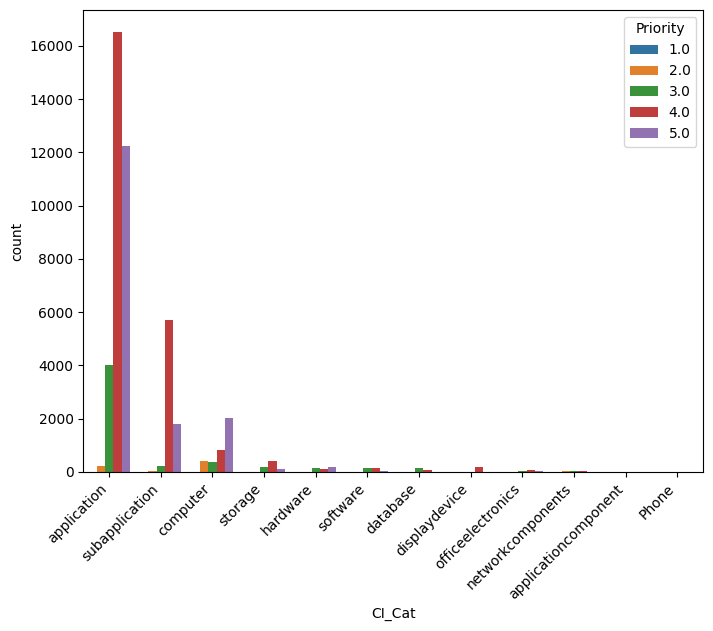

In [286]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="CI_Cat",hue="Priority",order=data["CI_Cat"].value_counts().index)
plt.xticks(rotation=45, ha="right")


In [287]:

CI_Cat= {
     'Phone': 0,
    'applicationcomponent': 1,
    'networkcomponents': 2,
    'officeelectronics': 3,
    'displaydevice': 4,
    'database': 5,
    'software': 6,
    'hardware': 7,
    'storage': 8,
    'computer': 9,
    'subapplication': 10,
    'application': 11
  }

# Map the 'CI_Cat' column to numeric values
data['CI_Cat'] = data['CI_Cat'].map(CI_Cat)




In [288]:
data.head(2)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,Web Based Application,Closed,4,4,4.0,0.601292,incident,0.0,Other,1.0
1,11,Web Based Application,Closed,3,3,3.0,0.415050,incident,0.0,Software,1.0


In [289]:
#converting for CI_subcat

In [290]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

Server Based Application    18921
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: CI_Subcat, Length: 64, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, 'Server Based Application'),
  Text(1, 0, 'Web Based Application'),
  Text(2, 0, 'Desktop Application'),
  Text(3, 0, 'Laptop'),
  Text(4, 0, 'SAP'),
  Text(5, 0, 'Banking Device'),
  Text(6, 0, 'Citrix'),
  Text(7, 0, 'SAN'),
  Text(8, 0, 'Client Based Application'),
  Text(9, 0, 'Desktop'),
  Text(10, 0, 'DataCenterEquipment'),
  Text(11, 0, 'System Software'),
  Text(12, 0, 'Monitor'),
  Text(13, 0, 'Database'),
  Text(14, 0, 'Windows Server'),
  Text(15, 0, 'Controller'),
  Text(16, 0, 'Exchange'),
  Text(17, 0, 'Printer'),
  Text(18, 0, 'Omgeving'),
  Text(19, 0, 'Standard Application'),
  Text(20, 0, 'Scanner'),
  Text(21, 0, 'MigratieDummy'),
  Text(22, 0, 'Linux Server'),
  Text(2

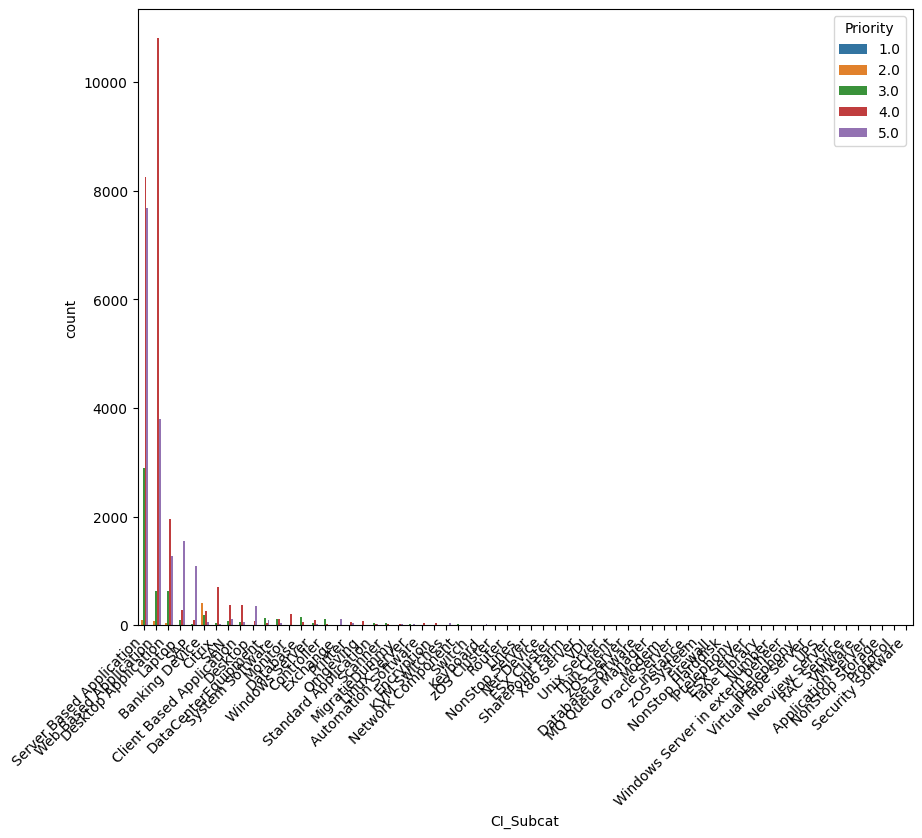

In [291]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="CI_Subcat",hue="Priority",order=data["CI_Subcat"].value_counts().index)
plt.xticks(rotation=45,ha="right")

In [292]:
CI_Subcat_mapping = {
    'Server Based Application': 63,
    'Web Based Application': 62,
    'Desktop Application': 61,
    'Laptop': 60,
    'SAP': 59,
    'Banking Device': 58,
    'Citrix': 57,
    'SAN': 56,
    'Client Based Application': 55,
    'Desktop': 54,
    'DataCenterEquipment': 53,
    'System Software': 52,
    'Monitor': 51,
    'Database': 50,
    'Windows Server': 49,
    'Controller': 48,
    'Exchange': 47,
    'Printer': 46,
    'Omgeving': 45,
    'Standard Application': 44,
    'Scanner': 43,
    'MigratieDummy': 42,
    'Linux Server': 41,
    'Automation Software': 40,
    'Encryption': 39,
    'KVM Switches': 38,
    'Network Component': 37,
    'Switch': 36,
    'Keyboard': 35,
    'zOS Cluster': 34,
    'Router': 33,
    'Lines': 32,
    'NonStop Server': 31,
    'Net Device': 30,
    'ESX Cluster': 29,
    'SharePoint Farm': 28,
    'X86 Server': 27,
    'VDI': 26,
    'Unix Server': 25,
    'Thin Client': 24,
    'zOS Server': 23,
    'Database Software': 22,
    'MQ Queue Manager': 21,
    'Modem': 20,
    'Oracle Server': 19,
    'Instance': 18,
    'zOS Systeem': 17,
    'Firewall': 16,
    'NonStop Harddisk': 15,
    'IPtelephony': 14,
    'ESX Server': 13,
    'Tape Library': 12,
    'Number': 11,
    'Windows Server in extern beheer': 10,
    'Iptelephony': 9,
    'Virtual Tape Server': 8,
    'UPS': 7,
    'Neoview Server': 6,
    'RAC Service': 5,
    'VMWare': 4,
    'Application Server': 3,
    'NonStop Storage': 2,
    'Protocol': 1,
    'Security Software': 0,
}

data['CI_Subcat'] = data['CI_Subcat'].map(CI_Subcat_mapping)


In [293]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,Closed,4,4,4.0,0.601292,incident,0.0,Other,1.0
1,11,62,Closed,3,3,3.0,0.415050,incident,0.0,Software,1.0
2,11,61,Closed,NS,3,4.0,0.517551,request for information,3.0,No error - works as designed,1.0
3,11,62,Closed,4,4,4.0,0.642927,incident,0.0,Operator error,1.0
4,11,62,Closed,4,4,4.0,0.345258,incident,2.0,Other,1.0


In [294]:
#converting for status

In [295]:
data.Status.unique()
data.Status.value_counts()

Closed              46596
Work in progress        9
Name: Status, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

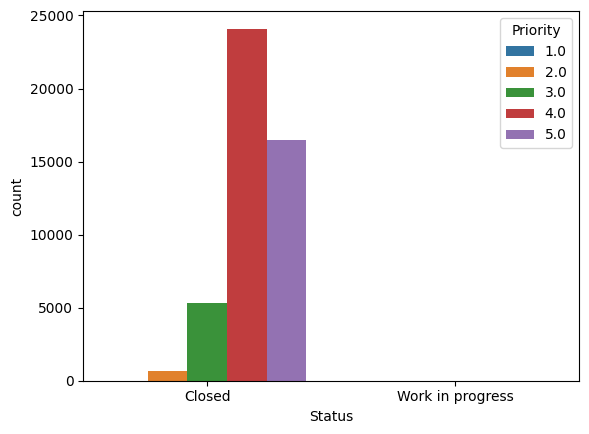

In [296]:
sns.countplot(data=data,x="Status",hue="Priority")

In [297]:
# Define a mapping for the 'Status' column
status_mapping = {
    'Closed': 1,
    'Work in progress': 0
}

# Map the 'Status' column to numeric values
data['Status'] =data['Status'].map(status_mapping)


In [298]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,1,4,4,4.0,0.601292,incident,0.0,Other,1.0
1,11,62,1,3,3,3.0,0.415050,incident,0.0,Software,1.0
2,11,61,1,NS,3,4.0,0.517551,request for information,3.0,No error - works as designed,1.0
3,11,62,1,4,4,4.0,0.642927,incident,0.0,Operator error,1.0
4,11,62,1,4,4,4.0,0.345258,incident,2.0,Other,1.0


In [299]:
#converting for impact


In [300]:
data.Impact.unique()
data.Impact.value_counts()


4     22556
5     16740
3      5234
NS     1380
2       692
1         3
Name: Impact, dtype: int64

<Axes: xlabel='Impact', ylabel='count'>

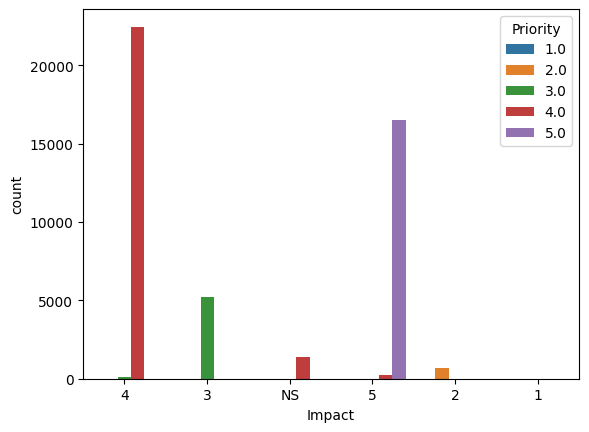

In [301]:
sns.countplot(data=data,x="Impact",hue="Priority")

In [302]:
Impact_mapping={
    "4":5,
    "5":4,
    "3":3,
    "NS":2,
    "2":1,
    "1":0
}
data["Impact"]=data["Impact"].map(Impact_mapping)

In [303]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,1,5,4,4.0,0.601292,incident,0.0,Other,1.0
1,11,62,1,3,3,3.0,0.415050,incident,0.0,Software,1.0
2,11,61,1,2,3,4.0,0.517551,request for information,3.0,No error - works as designed,1.0
3,11,62,1,5,4,4.0,0.642927,incident,0.0,Operator error,1.0
4,11,62,1,5,4,4.0,0.345258,incident,2.0,Other,1.0


In [304]:
#converting for urgency

In [305]:
data.Urgency.unique()
data.Urgency.value_counts()

4               15526
5               12283
4                7062
5                4495
3                4419
3                2117
2                 538
2                 158
1                   5
1                   1
5 - Very Low        1
Name: Urgency, dtype: int64

<Axes: xlabel='Urgency', ylabel='count'>

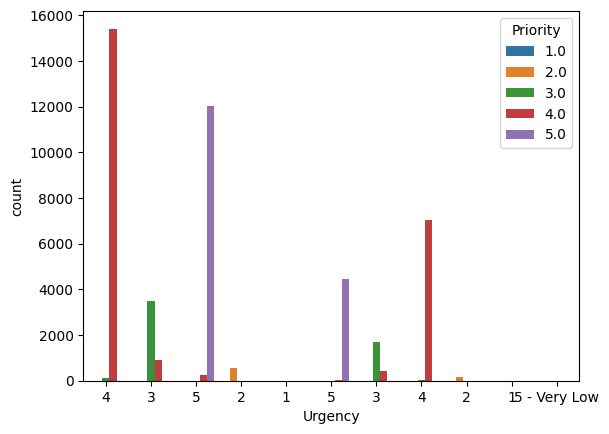

In [306]:
sns.countplot(data=data,x="Urgency",hue="Priority")

In [307]:
# # Define a mapping for the 'Urgency' column
# urgency_mapping = {
#    1: 1,
#    1: 2,
#    2: 3,
#    2: 4,
#    3: 5,
#    3: 6,
#    5: 7,
#    5: 8,
#    4: 9,
#    4: 10,
#   '5 - Very Low': 0  # Assuming '5 - Very Low' is mapped to 0
# }

# # Map the 'Urgency' column to numeric values
# data['Urgency'] = data['Urgency'].map(urgency_mapping)





In [308]:
data.loc[data['Urgency']=="5 - Very Low","Urgency"]=0

In [309]:
data.Urgency=data["Urgency"].astype("int32")

In [310]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,1,5,4,4.0,0.601292,incident,0.0,Other,1.0
1,11,62,1,3,3,3.0,0.415050,incident,0.0,Software,1.0
2,11,61,1,2,3,4.0,0.517551,request for information,3.0,No error - works as designed,1.0
3,11,62,1,5,4,4.0,0.642927,incident,0.0,Operator error,1.0
4,11,62,1,5,4,4.0,0.345258,incident,2.0,Other,1.0


In [311]:
#converting for category

In [312]:
data.Category.unique()
data.Category.value_counts()

incident                   37748
request for information     8846
complaint                     11
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

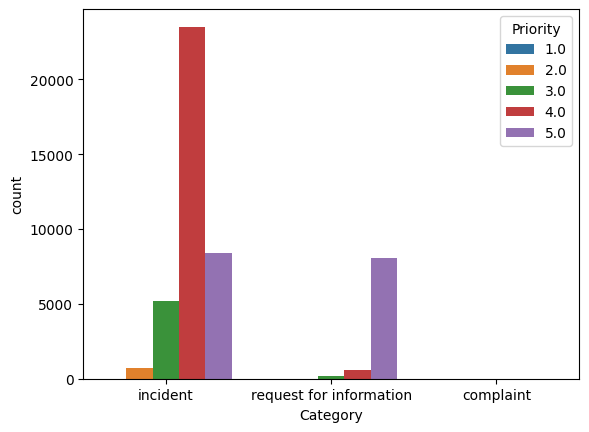

In [313]:
sns.countplot(data=data,x="Category",hue="Priority")

In [314]:
Category_mapping={
    "incident":2,
    "request for information":1,
    "complaint":0
}
data["Category"]=data["Category"].map(Category_mapping)

In [315]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,1,5,4,4.0,0.601292,2,0.0,Other,1.0
1,11,62,1,3,3,3.0,0.415050,2,0.0,Software,1.0
2,11,61,1,2,3,4.0,0.517551,1,3.0,No error - works as designed,1.0
3,11,62,1,5,4,4.0,0.642927,2,0.0,Operator error,1.0
4,11,62,1,5,4,4.0,0.345258,2,2.0,Other,1.0


In [316]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Reopen_Time', 'Closure_Code'],
      dtype='object')

In [317]:
#converting for closure_code


In [318]:
data.Closure_Code.unique()
data.Closure_Code.value_counts()

Other                           16470
Software                        13026
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
other                             460
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: Closure_Code, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'User error'),
  Text(3, 0, 'No error - works as designed'),
  Text(4, 0, 'Hardware'),
  Text(5, 0, 'Data'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'Operator error'),
  Text(8, 0, 'User manual not used'),
  Text(9, 0, 'other'),
  Text(10, 0, 'Inquiry'),
  Text(11, 0, 'Referred'),
  Text(12, 0, 'Questions'),
  Text(13, 0, 'Kwaliteit van de output'),
  Text(14, 0, 'Overig')])

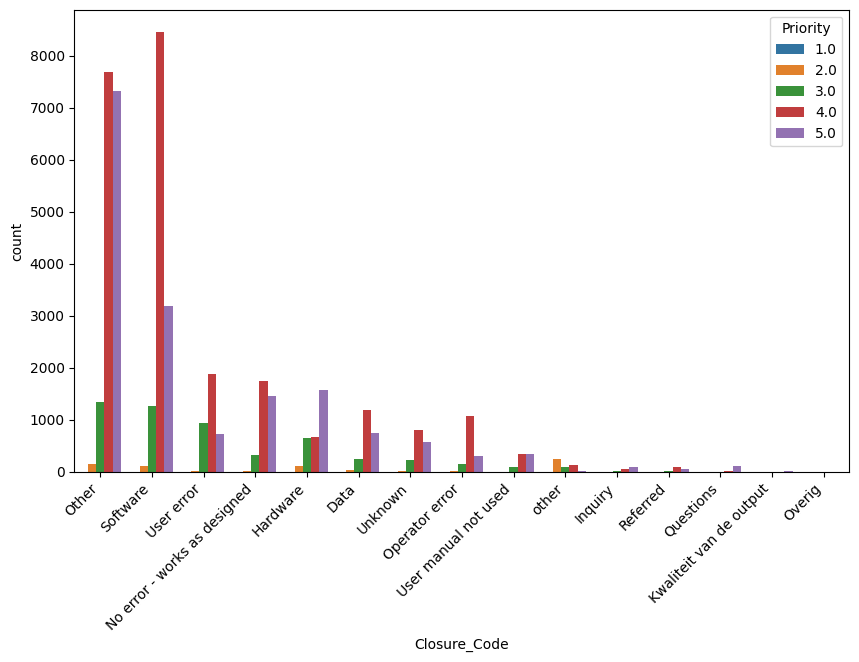

In [319]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Closure_Code",hue="Priority",order=data["Closure_Code"].value_counts().index)
plt.xticks(rotation=45,ha="right")

In [320]:

# Define a mapping dictionary
closure_code_mapping = {
    'Overig': 0,
    'Kwaliteit van de output': 1,
    'Questions': 2,
    'Referred': 3,
    'Inquiry': 4,
    'other': 5,
    'User manual not used': 6,
    'Operator error': 7,
    'Unknown': 8,
    'Data': 9,
    'Hardware': 10,
    'No error - works as designed': 11,
    'User error': 12,
    'Software': 13,
    'Other': 14
}

# Map the 'Closure_Code' column to numeric values
data['Closure_Code'] = data['Closure_Code'].map(closure_code_mapping)


In [321]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,1,5,4,4.0,0.601292,2,0.0,14,1.0
1,11,62,1,3,3,3.0,0.415050,2,0.0,13,1.0
2,11,61,1,2,3,4.0,0.517551,1,3.0,11,1.0
3,11,62,1,5,4,4.0,0.642927,2,0.0,7,1.0
4,11,62,1,5,4,4.0,0.345258,2,2.0,14,1.0


In [322]:
data.Category.unique()
data.Category.value_counts()

2    37748
1     8846
0       11
Name: Category, dtype: int64

In [323]:
data.head(10)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,1,5,4,4.0,0.601292,2,0.0,14,1.0
1,11,62,1,3,3,3.0,0.415050,2,0.0,13,1.0
2,11,61,1,2,3,4.0,0.517551,1,3.0,11,1.0
3,11,62,1,5,4,4.0,0.642927,2,0.0,7,1.0
4,11,62,1,5,4,4.0,0.345258,2,2.0,14,1.0
5,11,62,1,5,4,4.0,0.006676,2,4.0,14,1.0
6,11,62,1,5,4,4.0,0.192907,2,2.0,8,1.0
7,11,62,1,5,4,4.0,0.996468,2,5.0,14,1.0
8,11,62,1,2,3,4.0,0.269574,2,2.0,14,1.0
9,11,62,1,5,4,4.0,0.306670,2,2.0,11,1.0


In [324]:
data.Priority=data["Priority"].astype("int32")

In [325]:
data.No_of_Related_Interactions=data["No_of_Related_Interactions"].astype("int32")

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 0 to 46605
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  int64  
 1   CI_Subcat                   46605 non-null  int64  
 2   Status                      46605 non-null  int64  
 3   Impact                      46605 non-null  int64  
 4   Urgency                     46605 non-null  int32  
 5   Priority                    46605 non-null  int32  
 6   number_cnt                  46605 non-null  float64
 7   Category                    46605 non-null  int64  
 8   No_of_Reassignments         46605 non-null  float64
 9   Closure_Code                46605 non-null  int64  
 10  No_of_Related_Interactions  46605 non-null  int32  
dtypes: float64(2), int32(3), int64(6)
memory usage: 3.7 MB


In [327]:
data.head(10)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,1,5,4,4,0.601292,2,0.0,14,1
1,11,62,1,3,3,3,0.415050,2,0.0,13,1
2,11,61,1,2,3,4,0.517551,1,3.0,11,1
3,11,62,1,5,4,4,0.642927,2,0.0,7,1
4,11,62,1,5,4,4,0.345258,2,2.0,14,1
5,11,62,1,5,4,4,0.006676,2,4.0,14,1
6,11,62,1,5,4,4,0.192907,2,2.0,8,1
7,11,62,1,5,4,4,0.996468,2,5.0,14,1
8,11,62,1,2,3,4,0.269574,2,2.0,14,1
9,11,62,1,5,4,4,0.306670,2,2.0,11,1


In [328]:
data.No_of_Related_Interactions.unique()
data.No_of_Related_Interactions.value_counts()

1      43171
2       2736
3        429
4        124
5         30
6         16
7         12
8          6
12         6
9          5
20         5
13         4
42         3
22         3
19         3
10         3
15         3
39         2
26         2
11         2
33         2
44         2
17         2
16         2
14         2
23         2
45         2
18         2
34         2
29         2
28         2
55         1
43         1
25         1
27         1
370        1
40         1
37         1
57         1
118        1
24         1
74         1
41         1
30         1
88         1
31         1
54         1
288        1
21         1
Name: No_of_Related_Interactions, dtype: int64

##**Feature Scaling**

In [329]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler
scaler = MinMaxScaler()
dat_drop=['CI_Cat','CI_Subcat', 'Status', 'Impact','Priority','Urgency','Category', 'No_of_Reassignments',
       'Closure_Code', 'No_of_Related_Interactions']
# Fit the scaler on the specified columns and transform the data
data1 = scaler.fit_transform(data.drop(dat_drop,axis=1))
data2=pd.DataFrame(data1,columns=['number_cnt'])
data2

,number_cnt
0,0.601285
1,0.415038
2,0.517542
3,0.642921
4,0.345245
...,...
46600,0.231879
46601,0.805151
46602,0.917467
46603,0.701274


In [330]:
data3=data[['CI_Cat','CI_Subcat', 'Status', 'Impact','Priority','Urgency','Category', 'No_of_Reassignments',
       'Closure_Code', 'No_of_Related_Interactions']]
scaled_data=pd.concat([data2,data3],axis=1)
scaled_data

,number_cnt,CI_Cat,CI_Subcat,Status,Impact,Priority,Urgency,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,0.601285,10.0,62.0,1.0,5.0,4.0,4.0,2.0,0.0,14.0,1.0
1,0.415038,11.0,62.0,1.0,3.0,3.0,3.0,2.0,0.0,13.0,1.0
2,0.517542,11.0,61.0,1.0,2.0,4.0,3.0,1.0,3.0,11.0,1.0
3,0.642921,11.0,62.0,1.0,5.0,4.0,4.0,2.0,0.0,7.0,1.0
4,0.345245,11.0,62.0,1.0,5.0,4.0,4.0,2.0,2.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
46601,0.805151,11.0,63.0,1.0,5.0,4.0,4.0,2.0,0.0,14.0,1.0
46602,0.917467,11.0,63.0,1.0,5.0,4.0,4.0,2.0,0.0,12.0,1.0
46603,0.701274,9.0,60.0,1.0,4.0,5.0,5.0,2.0,0.0,10.0,1.0
46604,0.902320,11.0,62.0,1.0,5.0,4.0,4.0,2.0,0.0,13.0,1.0


# **Feature Selection**

In [331]:
scaled_data.corr()

,number_cnt,CI_Cat,CI_Subcat,Status,Impact,Priority,Urgency,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
number_cnt,1.000000,-0.013469,-0.006906,-0.006368,-0.004791,-0.001873,-0.000507,-0.008861,0.000586,0.002553,0.002621
CI_Cat,-0.013469,1.000000,0.688771,0.016781,0.119648,0.110242,0.117943,-0.118018,0.035354,0.142082,0.010668
CI_Subcat,-0.006906,0.688771,1.000000,0.010150,0.124865,0.093083,0.102157,-0.069048,0.008123,0.087460,-0.002260
Status,-0.006368,0.016781,0.010150,1.000000,0.021728,0.021929,0.022801,-0.006727,-0.006869,0.004353,0.000814
Impact,-0.004791,0.119648,0.124865,0.021728,1.000000,0.234440,0.328084,0.135758,-0.000831,0.112630,-0.013763
Priority,-0.001873,0.110242,0.093083,0.021929,0.234440,1.000000,0.962213,-0.477394,0.093408,0.087934,-0.023668
Urgency,-0.000507,0.117943,0.102157,0.022801,0.328084,0.962213,1.000000,-0.470774,0.093885,0.090778,-0.022825
Category,-0.008861,-0.118018,-0.069048,-0.006727,0.135758,-0.477394,-0.470774,1.000000,-0.094284,-0.055994,0.008958
No_of_Reassignments,0.000586,0.035354,0.008123,-0.006869,-0.000831,0.093408,0.093885,-0.094284,1.000000,0.040799,0.025640
Closure_Code,0.002553,0.142082,0.087460,0.004353,0.112630,0.087934,0.090778,-0.055994,0.040799,1.000000,0.007999


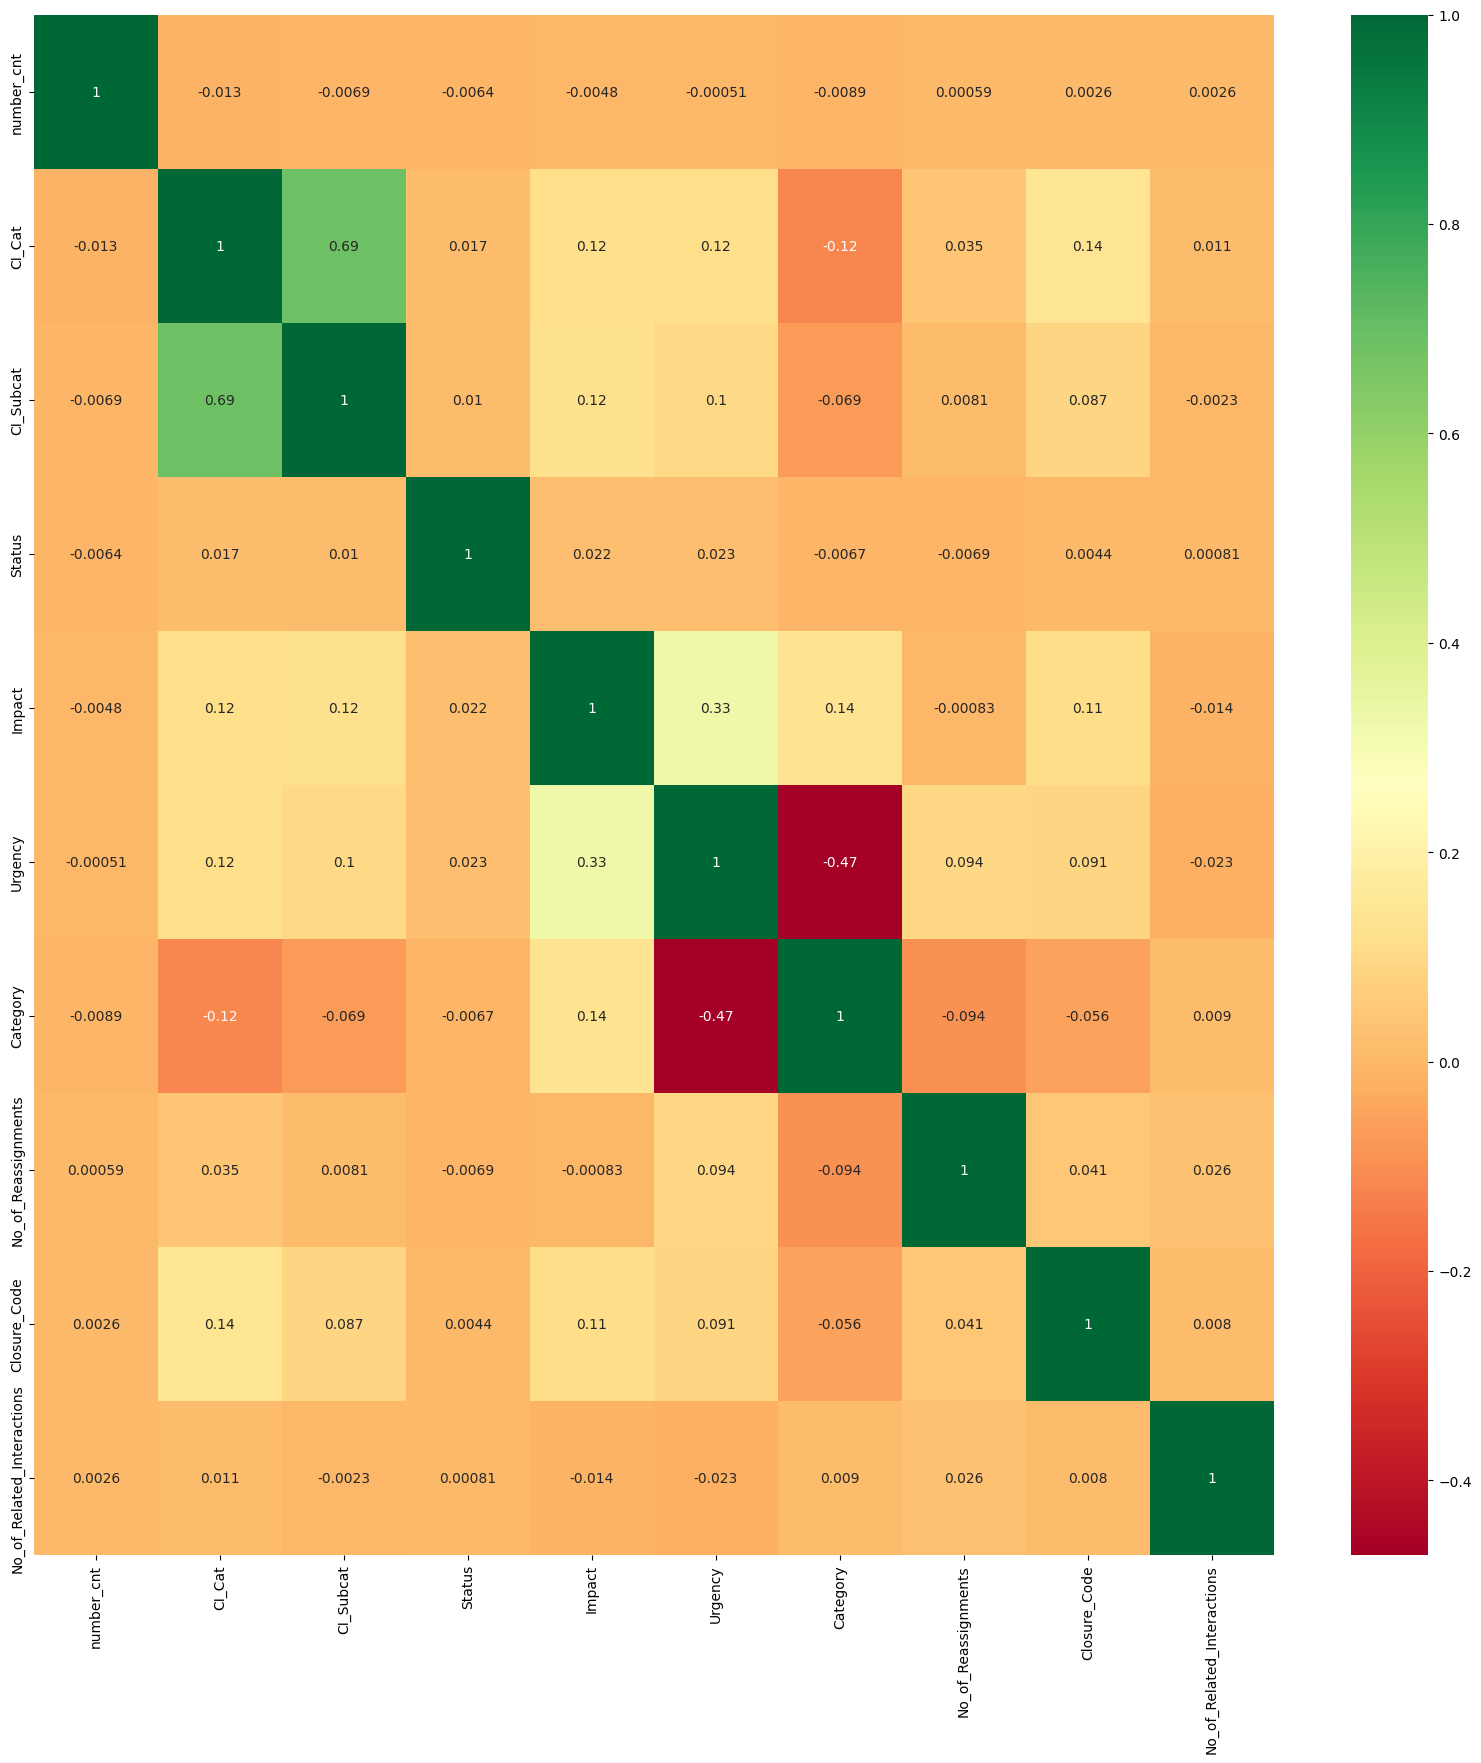

In [348]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = scaled_data.drop("Priority",axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

#We have a Small Number of Datas. So we are not Dropping such columns. It has very less Correlation with Priority.

#**Split the Data**

In [352]:
x=data.drop("Priority",axis=1)
y=data.Priority

In [353]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [354]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
best_features = selector.fit(x,y)

# Identify features with low p-values
Irrelevant_features = x.columns[~best_features.get_support()]

In [355]:
data_cleaned =data.drop(columns=Irrelevant_features)

In [356]:
data_cleaned

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,10,62,1,5,4,4,0.601292,2,0.0,14,1
1,11,62,1,3,3,3,0.415050,2,0.0,13,1
2,11,61,1,2,3,4,0.517551,1,3.0,11,1
3,11,62,1,5,4,4,0.642927,2,0.0,7,1
4,11,62,1,5,4,4,0.345258,2,2.0,14,1
...,...,...,...,...,...,...,...,...,...,...,...
46601,11,63,1,5,4,4,0.231896,2,0.0,14,1
46602,11,63,1,5,4,4,0.805153,2,0.0,12,1
46603,9,60,1,4,5,5,0.917466,2,0.0,10,1
46604,11,62,1,5,4,4,0.701278,2,0.0,13,1


#**Feature Engineering Report**
###A Feature Engineering Report for an IT Service Management (ITSM) project involves detailing the process of selecting, modifying, and transforming raw data into features that are used for training machine learning models or for analysis.

*   We are using a heatmap to visualize the Pearson correlation matrix for features in our dataset, excluding the "Priority" column. This is a common and insightful approach to understand the relationships between different features.
*   Annotations on the heatmap provide the exact correlation coefficient values.
Focus on high correlation values, both positive and negative.

*   High positive or negative correlations between two features may indicate collinearity.If strong correlations between pairs of features are identified, consider whether feature engineering or dimensionality reduction techniques are needed.
*  The heatmap can help inform feature selection decisions. If two features are highly correlated, including both might not provide much additional information to the model. Here There are not high correlated.

*   You might want to adjust the figure size and font size for better readability, especially if you have a large number of features.
*   Correlation analysis can sometimes highlight data quality issues. For example, unexpected high correlations may indicate errors or outliers in the data.

*  And We used Select Kbest classifier for selecting the Important Features which we are given the k values.

###Provide a concise summary of the key findings and outcomes of the feature engineering process, emphasizing its contribution to the overall success of the ITSM project.






# **Model Building**